In [96]:
import os
from functions import * # import util functions
from collections import Counter
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# paths
cwd = os.getcwd()
image_folder = '/images'
images_path = cwd + image_folder

In [ ]:
def get_edge(indx_list, img1):

        img2 = np.random.choice(path_list, 1, replace= False).item()

        # Save the two paths
        edge = tuple([img1,img2])
    
    # CHECK: img should not be the same as img2 and the pair should not already have been compared
        while img1 == img2 or two_paths in indx_list or (two_paths[1], two_paths[0]) in indx_list:

            # while there is an issue, drae a new img2
            img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image

            # we make a new two_paths
            edge = tuple([img1,img2])

        #when happy, return the new pair:
        return(edge)

In [100]:


# util functions:
#indx_list = getIndexList(cwd)
indx_list = [] # just for tests
path_list = getImagesPath(images_path)

# hyperparameters:

# set seed
np.random.seed(42)

# I set n_pairs to 27000 which is what is possible if you can annotate one pair every 10 seconds (you likely can't)
#n_pairs = int((75*60*60)/10) # one pair, every ten seconds for 75 hours.
n_pairs = 100 # for test run

# number of edges between every node
m = 5

# while we have not create the whole network
while len(indx_list) < n_pairs: 

    # if it is the first entry, draw a random entry
    if len(indx_list) == 0:
        img1 = np.random.choice(path_list, 1, replace= False).item()


    # if it is not the first entry, 
    else:

        # find all current nodes
        current_nodes = np.array(indx_list).reshape(-1)

        # find all nodes with 5 edges
        current_nodes_m = Counter(current_nodes)

        # only keep nodes with less then m edges
        eligible_nodes = [key for (key,value) in current_nodes_m.items() if value < m]
        
        # draw new img1
        img1 =  np.random.choice(eligible_nodes, 1, replace= False).item()
    
    # when we have our img1, we set the edge counter and draw m edges
    edge_counter = 0

    # While img1 have less then m edges
    while edge_counter < m:

        # draw and edge between img1 and another image (img2)
        edge = get_edge(indx_list, img1)

        # append the new edge to your indx_list
        indx_list.append(edge)

        #update the edge counter
        edge_counter += 1


In [102]:
len(indx_list)

100

In [103]:
G = nx.from_edgelist(indx_list)
print(f'Is the network connected: {nx.is_connected(G)}')

Is the network connected: True


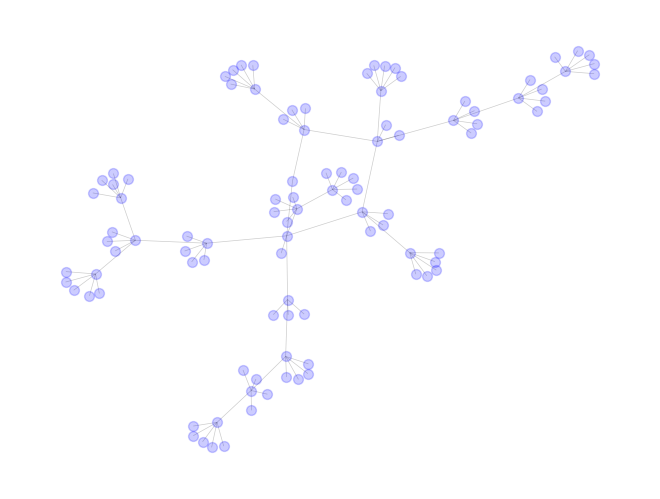

In [104]:
nx.draw(G, node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')
plt.show()

In [105]:
print(np.mean(list(dict(G.degree).values())))
print(np.min(list(dict(G.degree).values())))
print(np.max(list(dict(G.degree).values())))

2.0
1
6


In [99]:
from collections import Counter
nodes = [(1,2),(1,3),(4,5),(3,6)]
nodes = np.array(nodes).reshape(-1)
counted_nodes = Counter(nodes)
new = [key for (key,value) in counted_nodes.items() if value < 2] # 2 is m

new


[2, 4, 5, 6]

In [92]:
from collections import Counter

nodes = [(1,2),(1,3),(4,5),(3,6)]
print(nodes)

nodes = np.array(nodes).reshape(-1)
print(nodes)

counted_nodes = Counter(nodes)
print(counted_nodes)

counted_nodes.values()

[(1, 2), (1, 3), (4, 5), (3, 6)]
[1 2 1 3 4 5 3 6]
Counter({1: 2, 3: 2, 2: 1, 4: 1, 5: 1, 6: 1})


dict_values([2, 1, 2, 1, 1, 1])

In [93]:
newDict = { key:value for (key,value) in counted_nodes.items() if value == 2}
newDict

{1: 2, 3: 2}

In [94]:
new = [key for (key,value) in counted_nodes.items() if value == 2]
new

[1, 3]

In [86]:
list(filter(lambda value: value == 2, counted_nodes.keys()))

[2]

In [87]:
newDict = dict(filter(lambda elem: len(elem[1]) == 2, counted_nodes.items()))

TypeError: object of type 'int' has no len()

In [ ]:
# img1 have 0 edges tp begin with
edge_counter = 0 

# while img1 does not have m edges, pair it with a new image
while edge_counter < m:



In [35]:
indx_list

[('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS54209.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS72335.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS54209.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS51440.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS54209.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS23647.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS54209.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS118658.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS54209.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS114982.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS106672.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS52887.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS106672.jpg',
  '/home/simon/

In [36]:
G = nx.from_edgelist(indx_list)
print(f'Is the network connected: {nx.is_connected(G)}')

Is the network connected: False


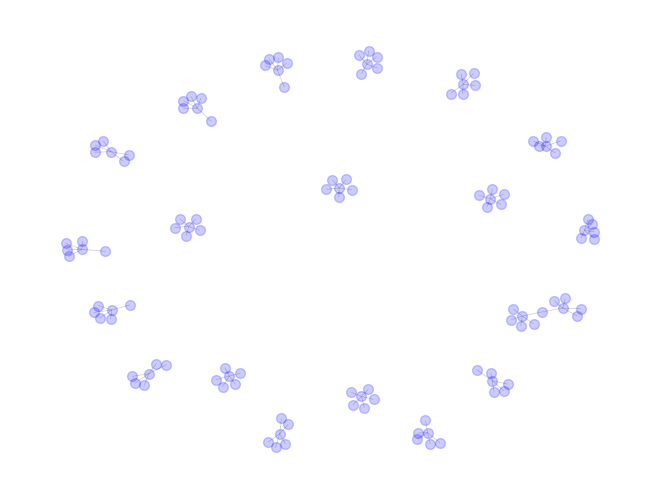

In [37]:
nx.draw(G, node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')
plt.show()

In [58]:
indx_list = [(1,2),(3,4),(5,6)]

img1 = np.random.choice(np.array(indx_list).reshape(-1), 1 , replace= False).item()
img1

6

In [68]:
img1_list = [1,6]
print(img1_list)

current_nodes = np.array(indx_list).reshape(-1)
eligible_nodes = np.setdiff1d(current_nodes, img1_list)

print(current_nodes)
print(eligible_nodes)

[1, 6]
[1 2 3 4 5 6]
[2 3 4 5]


## Working, but the skewed distribution might cause trouble...

In [ ]:
# path_list = getImagesPath(images_path)
# print(len(path_list))

# n = len(path_list)
# unique_pairs = int((n*(n-1))/2)
# print(unique_pairs)

# n_pairs = 10000#(75*60*60)/10
# print(n_pairs)

# indx_list = [] # where do you use this now?
# path_list = getImagesPath(images_path)

In [ ]:
"""Get two random paths from path_list wich are not already in index_list.
Then add to index_list and update it"""

# I could do this with networksX but this way the network is dynamically generated as their go through the pairs.

# set seed
np.random.seed(42)

# util functions:
#indx_list = getIndexList(cwd)
indx_list = [] 
path_list = getImagesPath(images_path)

n = len(path_list)
unique_pairs = int((n*(n-1))/2)
print(unique_pairs) # way too many

# I set n_pairs to 27000 which is what is possible if you can annotate one pair every 10 seconds (you likely can't)
n_pairs = int((75*60*60)/10) # one pair, every ten seconds for 75 hours.
#n_pairs = 1000 # for test run
print(n_pairs) # better

while len(indx_list) < n_pairs: 
    
    # for empty indx_list
    if len(indx_list) == 0:
        # get two now paths paths
        two_paths = tuple(np.random.choice(path_list, 2, replace= False))# indx of pairs

    else: 
        img1 = np.random.choice(np.array(indx_list).reshape(-1), 1 , replace= False).item() # one image already in the image list.
        img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image

        # the images should not be the same
        while img1 == img2:
            img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image

        # Save the two paths when their are not the same
        two_paths = tuple([img1,img2])

    # if the pair have already been compared, draw a new pair
    while two_paths in indx_list:
        rand_int = np.random.randint(0,2)
        img1 = np.random.choice(np.array(indx_list).reshape(-1), 1 , replace= False).item() # one image already in the image list.
        img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image
        
        # Save the two paths
        two_paths = tuple([img1,img2])

    indx_list.append(two_paths) # update index_list
    # 11-12 min to run 

12497500
27000


In [ ]:
G = nx.from_edgelist(indx_list)
print(f'Is the network connected: {nx.is_connected(G)}')

Is the network connected: True


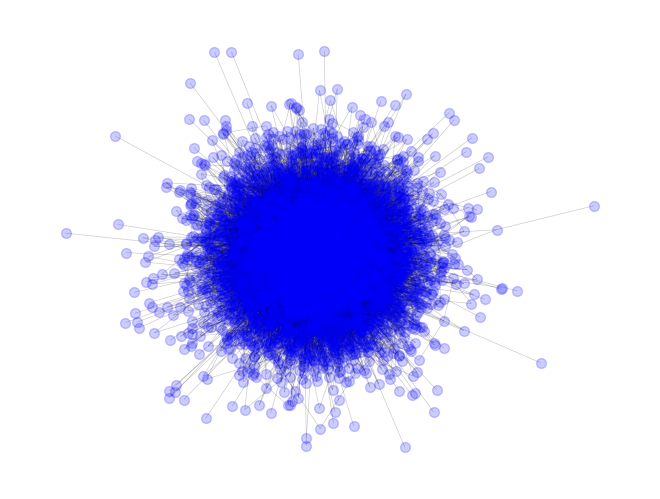

In [ ]:
nx.draw(G, node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')
plt.show()

In [ ]:
G_degrees = list(dict(G.degree).values())
print(np.mean(G_degrees))
print(np.min(G_degrees))
print(np.max(G_degrees))

10.836714199638482
1
305


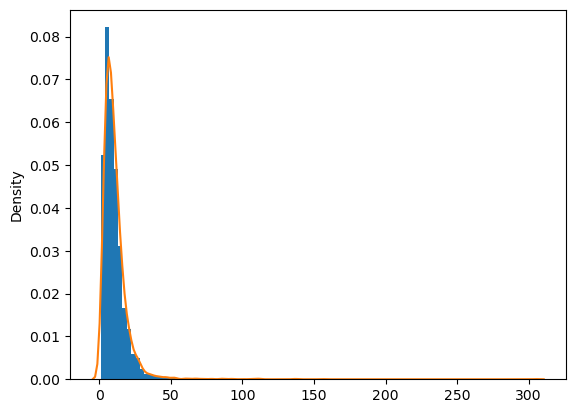

In [ ]:
plt.hist(G_degrees, bins=100, density= True)
sns.kdeplot(G_degrees)
plt.show()

# OLD

Is the network connected: True


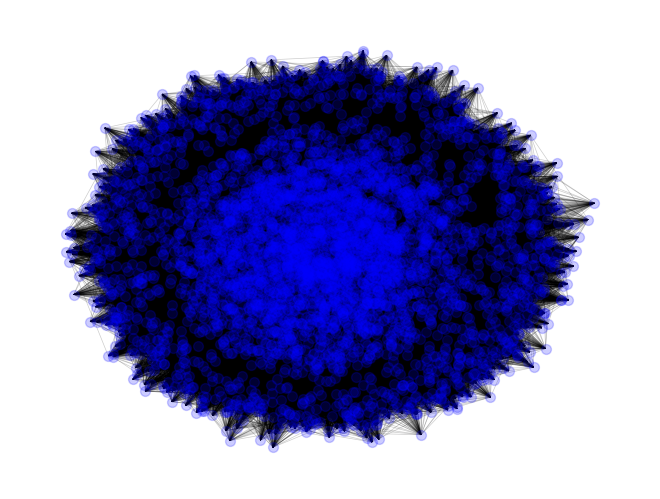

In [ ]:
# G = nx.gnp_random_graph(n_pairs,0.01)
G = nx.fast_gnp_random_graph(n_pairs,0.01)
print(f'Is the network connected: {nx.is_connected(G)}')

np.random.seed(42)
path_subset = list(np.random.choice(path_list, n_pairs))
mapping = dict(zip(G.nodes(), path_subset))
G = nx.relabel_nodes(G, mapping)
#G.nodes()

nx.draw(G, node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')
plt.show()

In [ ]:
print(np.mean(list(dict(G.degree).values())))
print(np.min(list(dict(G.degree).values())))
print(np.max(list(dict(G.degree).values())))

224.52137351086193
68
735


In [ ]:
"""Get two random paths from path_list wich are not already in index_list.
Then add to index_list and update it"""


# util functions:
#indx_list = getIndexList(cwd)
indx_list = []
path_list = getImagesPath(images_path)

#n = len(path_list)
#unique_pairs = int((n*(n-1))/2)
# unique_pairs == 12497500, which is simply to long. 
# I set n_pairs to 27000 which is what is possible if you can annotate one pair every 10 seconds (you likely can't)

n_pairs = int((75*60*60)/10) # one pair, every ten seconds for 75 hours.


while len(indx_list) < n_pairs: 
    
    # set seed
    np.random.seed(len(indx_list))

    # for empty indx_list
    if len(indx_list) == 0:
        # get two now paths paths
        two_paths = tuple(np.random.choice(path_list, 2, replace= False))# indx of pairs

    else: 
        img1 = np.random.choice(np.array(indx_list).reshape(-1), 1 , replace= False).item() # one image already in the image list.
        img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image

        # the images should not be the same
        while img1 == img2:
            img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image

        two_paths = tuple([img1,img2])

    # if the pair have already been compared, draw a new pair
    while two_paths in indx_list:
        rand_int = np.random.randint(0,2)
        img1 = np.random.choice(np.array(indx_list).reshape(-1), 1 , replace= False).item() # one image already in the image list.
        img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image
        two_paths = tuple([img1,img2])

    indx_list.append(two_paths) # update index_list
    # 11-12 min to run 

KeyboardInterrupt: 

In [ ]:
len(indx_list)

27001

In [ ]:
# now you can viz the network... in theory
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.from_edgelist(indx_list)
print(f'Is the network connected: {nx.is_connected(G)}')

Is the network connected: True


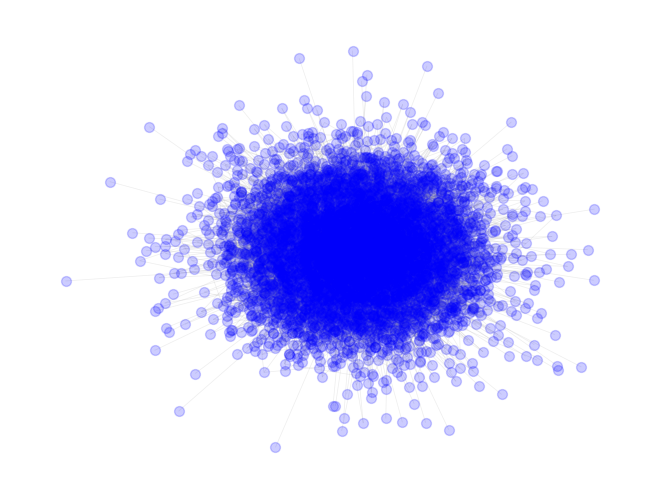

In [ ]:
nx.draw(G, node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')
plt.show()

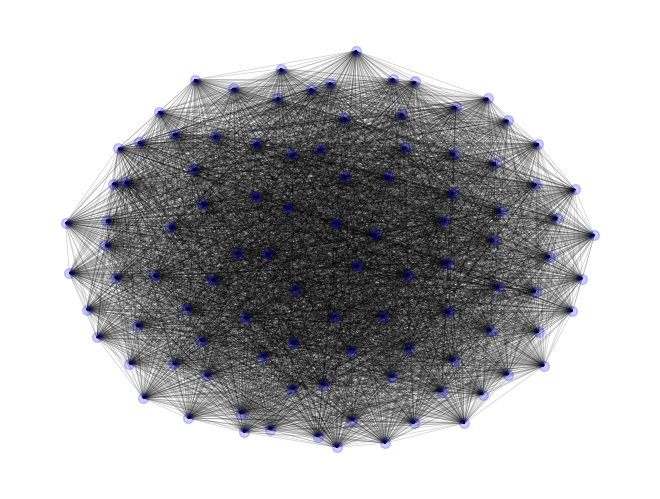

In [ ]:
G1 = nx.complete_graph(100)
nx.draw(G1, node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')
plt.show()

In [ ]:
G1 = nx.gnp_random_graph(10,0.5)


Error: Session cannot generate requests

In [ ]:
nx.is_connected(G1)

Error: Session cannot generate requests

In [ ]:
G1.

# path_list

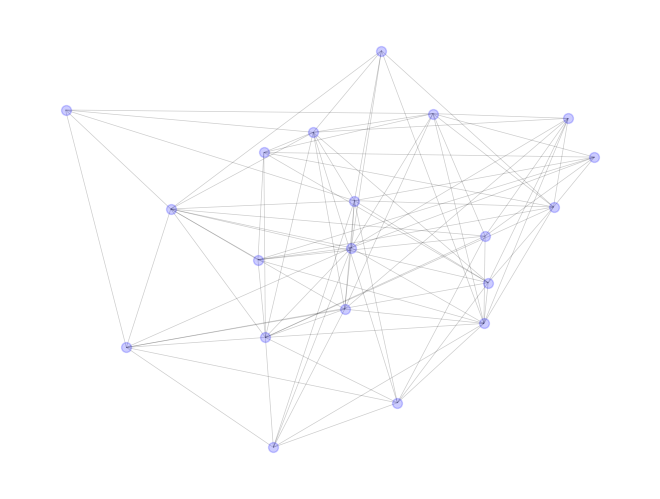

In [ ]:
G1 = nx.gnp_random_graph(20,0.5)
nx.draw(G1, node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')
plt.show()

In [ ]:
nx.draw?

Signature: nx.draw(G, pos=None, ax=None, **kwds)
Docstring:
Draw the graph G with Matplotlib.

Draw the graph as a simple representation with no node
labels or edge labels and using the full Matplotlib figure area
and no axis labels by default.  See draw_networkx() for more
full-featured drawing that allows title, axis labels etc.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

ax : Matplotlib Axes object, optional
    Draw the graph in specified Matplotlib axes.

kwds : optional keywords
    See networkx.draw_networkx() for a description of optional keywords.

Examples
--------
>>> G = nx.dodecahedral_graph()
>>> nx.draw(G)
>>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

See Also
--------
draw_networkx
draw_networkx_nodes
d

In [ ]:
 networkx.draw_networkx?

Signature: networkx.draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
Docstring:
Draw the graph G using Matplotlib.

Draw the graph with Matplotlib with options for node positions,
labeling, titles, and many other drawing features.
See draw() for simple drawing without labels or axes.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

arrows : bool or None, optional (default=None)
    If `None`, directed graphs draw arrowheads with
    `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
    via `~matplotlib.collections.LineCollection` for speed.
    If `True`, draw arrowheads with FancyArrowPatches (bendable and stylish).
    If `False`, draw edges using LineCollection (linear and fast).
    For directed

In [ ]:
indx_list

[('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS104274.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS96423.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS104274.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS149639.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS104274.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS128086.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS149639.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS54770.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS104274.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS96480.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS96480.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS81782.jpg'),
 ('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS104274.jpg',
  '/home/si

In [ ]:
def drawTwoPaths(cwd, images_path):

    """Get two random paths from path_list wich are not already in index_list.
    Then add to index_list and update it"""

    # util functions:
    indx_list = getIndexList(cwd)
    path_list = getImagesPath(images_path)

    # set seed
    np.random.seed(len(indx_list))

    # for empty indx_list
    if len(indx_list) == 0:
        # get two now paths paths
        two_paths = tuple(np.random.choice(path_list, 2, replace= False))# indx of pairs

    else: 
        img1 = np.random.choice(np.array(indx_list).reshape(-1), 1 , replace= False).item() # one image already in the image list.
        img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image

        # the images should not be the same
        while img1 == img2:
            img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image

        two_paths = tuple([img1,img2])

    # if the pair have already been compared, draw a new pair
    while two_paths in indx_list:
        rand_int = np.random.randint(0,2)
        img1 = np.random.choice(np.array(indx_list).reshape(-1), 1 , replace= False).item() # one image already in the image list.
        img2 = np.random.choice(path_list, 1, replace= False).item() # one potentially new image
        two_paths = tuple([img1,img2])

    indx_list.append(two_paths) # update index_list

    # return the two_paths and a updated indx_list
    return(two_paths, indx_list)

In [ ]:
two_p, indx_list = drawTwoPaths(cwd, images_path)

In [ ]:
indx_list

[('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS104274.jpg',
  '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS96423.jpg')]

In [ ]:
two_p

('/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS104274.jpg',
 '/home/simon/Documents/py_scripts/Tkinter/imgRanker/images/JS96423.jpg')